<a href="https://colab.research.google.com/github/sameehaafr/sigai-tsf/blob/master/lstm_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive  
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Load Libraries

In [ ]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import load_model
from keras.layers import LSTM, Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from numpy import array

### Load Data

In [ ]:
la_2020 = pd.read_csv('/content/gdrive/MyDrive/ML@P TSF/DATA/LA_pm10_2020.csv')
la_2021 = pd.read_csv('/content/gdrive/MyDrive/ML@P TSF/DATA/LA_pm10_2021.csv')
la_2022 = pd.read_csv('/content/gdrive/MyDrive/ML@P TSF/DATA/LA_pm10_2022.csv')

Subsetting Data to Date and Daily Mean PM10 Concentration

In [ ]:
la_2020 = la_2020[['Date', 'Daily Mean PM10 Concentration']]
la_2021 = la_2021[['Date', 'Daily Mean PM10 Concentration']]
la_2022 = la_2022[['Date', 'Daily Mean PM10 Concentration']]

Converting Date Column Datatype to Datetime

In [ ]:
la_2020['Date'] = pd.to_datetime(la_2020['Date'])
la_2021['Date'] = pd.to_datetime(la_2021['Date'])
la_2022['Date'] = pd.to_datetime(la_2022['Date'])

Merging the 3 Datasets

In [ ]:
# la_pm10 = pd.concat([la_2020, la_2021, la_2022])
# la_pm10.rename(columns = {'Daily Mean PM10 Concentration':'daily_pm10'}, inplace = True)

In [ ]:
la_pm10 = pd.concat([la_2020, la_2021])
la_pm10.rename(columns = {'Daily Mean PM10 Concentration':'daily_pm10'}, inplace = True)
la_2022.rename(columns = {'Daily Mean PM10 Concentration':'daily_pm10'}, inplace = True)

### Data Analysis

In [ ]:
# finding row with max pm10 value
la_pm10.loc[(la_pm10['daily_pm10'] == max(la_pm10['daily_pm10']))]

,Date,daily_pm10
906,2021-10-11,411


Normalizing the Data

In [ ]:
#normalizing
la_pm10['daily_pm10'] = (la_pm10['daily_pm10'] - la_pm10['daily_pm10'].mean()) / la_pm10['daily_pm10'].std()
#la_2022['daily_pm10'] = (la_2022['daily_pm10'] - la_2022['daily_pm10'].mean()) / la_2022['daily_pm10'].std()

In [ ]:
la_pm10

,Date,daily_pm10
0,2020-01-04,-0.159737
1,2020-01-10,-0.422918
2,2020-01-16,0.208717
3,2020-01-22,-0.370282
4,2020-01-28,-0.265009
...,...,...
983,2021-12-27,-1.159826
984,2021-12-28,-1.159826
985,2021-12-29,-1.212462
986,2021-12-30,-1.265098


Data Splitting

In [ ]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

Define the Input Sequence

In [ ]:
daily_pm10 = la_pm10['daily_pm10'].values.tolist()

In [ ]:
daily_pm10 = daily_pm10[0:len(daily_pm10)-1]

In [ ]:
x_train, y_train = split_sequence(daily_pm10, 10)

In [ ]:
x_train

array([[-0.15973694, -0.42291816,  0.20871675, ...,  0.20871675,
        -0.05446446, -0.4755544 ],
       [-0.42291816,  0.20871675, -0.37028191, ..., -0.05446446,
        -0.4755544 ,  0.36662548],
       [ 0.20871675, -0.37028191, -0.26500943, ..., -0.4755544 ,
         0.36662548, -1.21246179],
       ...,
       [-0.4755544 , -0.26500943,  0.10344427, ..., -1.21246179,
        -1.26509804, -1.15982555],
       [-0.26500943,  0.10344427,  0.261353  , ..., -1.26509804,
        -1.15982555, -1.15982555],
       [ 0.10344427,  0.261353  ,  0.10344427, ..., -1.15982555,
        -1.15982555, -1.21246179]])

In [ ]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

In [ ]:
x_train.shape

(1918, 10, 1)

In [ ]:
x_train

array([[[-0.15973694],
        [-0.42291816],
        [ 0.20871675],
        ...,
        [ 0.20871675],
        [-0.05446446],
        [-0.4755544 ]],

       [[-0.42291816],
        [ 0.20871675],
        [-0.37028191],
        ...,
        [-0.05446446],
        [-0.4755544 ],
        [ 0.36662548]],

       [[ 0.20871675],
        [-0.37028191],
        [-0.26500943],
        ...,
        [-0.4755544 ],
        [ 0.36662548],
        [-1.21246179]],

       ...,

       [[-0.4755544 ],
        [-0.26500943],
        [ 0.10344427],
        ...,
        [-1.21246179],
        [-1.26509804],
        [-1.15982555]],

       [[-0.26500943],
        [ 0.10344427],
        [ 0.261353  ],
        ...,
        [-1.26509804],
        [-1.15982555],
        [-1.15982555]],

       [[ 0.10344427],
        [ 0.261353  ],
        [ 0.10344427],
        ...,
        [-1.15982555],
        [-1.15982555],
        [-1.21246179]]])

### Defining Model

In [ ]:
# define model
n_steps = 10
n_features = 1
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

In [ ]:
time1 = time.perf_counter()
model.fit(x_train, y_train, epochs=200, verbose=0)
time2 = time.perf_counter()
print("model running time: ", time2-time1)

KeyboardInterrupt: ignored

Saving Model

In [ ]:
model.save('/content/gdrive/MyDrive/ML@P TSF/models/lstm_model_1.h5')

Making Predictions

In [ ]:
from keras.models import load_model
model = load_model('/content/gdrive/MyDrive/ML@P TSF/models/lstm_model_1.h5')

In [ ]:
yhat = model.predict(la_2022['daily_pm10'][0:20], verbose=0)
print(yhat)

[[-0.15450917]
 [-0.11166359]
 [-0.11282486]
 [-0.11059771]
 [-0.11043757]
 [-0.11993168]
 [-0.28879118]
 [-0.11096025]
 [-0.11688924]
 [-0.15450917]
 [-0.09915681]
 [-0.11043757]
 [-0.24403909]
 [-0.21736647]
 [-0.11166359]
 [-0.32152057]
 [-0.24403909]
 [-0.11031957]
 [-0.11166359]
 [-0.24403909]]


In [ ]:
la_2022['daily_pm10_normalized'] = (la_2022['daily_pm10'] - la_2022['daily_pm10'].mean()) / la_2022['daily_pm10'].std()

In [ ]:
la_2022['daily_pm10_normalized'][0:20]

0    -0.026112
1    -0.869141
2    -0.784838
3    -1.037747
4    -1.122050
5    -0.531930
6     0.901219
7    -0.953444
8    -0.616232
9    -0.026112
10   -1.712169
11   -1.122050
12    0.648310
13    0.479705
14   -0.869141
15    1.069825
16    0.648310
17   -1.206352
18   -0.869141
19    0.648310
Name: daily_pm10_normalized, dtype: float64

In [ ]:
actual = la_2022['daily_pm10_normalized'][0:20]

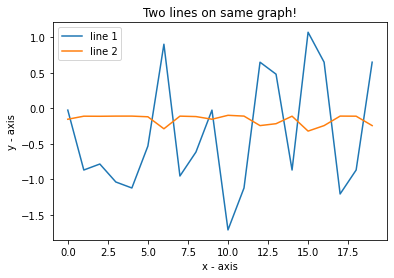

In [ ]:
# plotting the line 1 points 
plt.plot(actual, label = "line 1")
# plotting the line 2 points 
plt.plot(yhat, label = "line 2")
  
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
# giving a title to my graph
plt.title('Two lines on same graph!')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

Validating Model

In [ ]:
mean_squared_error(actual, yhat)

0.6184808277104459